# Caltech Machine Learning Homework # 2

In [11]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from typing import List

Instructions: https://work.caltech.edu/homework/hw2.pdf

Answers: http://work.caltech.edu/homework/hw2_sol.pdf

## Hoeffding Inequality

![](imgs/hoeffding1.png)

In [34]:
N = 1000
M = 10

results = {}

for n in range(N):
    results[f'c{n+1}'] = [random.choice(['H', 'T']) for _ in range(M)] 

print(list(results.items())[:10])

[('c1', ['T', 'H', 'H', 'T', 'H', 'H', 'H', 'T', 'T', 'H']), ('c2', ['H', 'H', 'T', 'H', 'H', 'H', 'H', 'H', 'T', 'T']), ('c3', ['H', 'H', 'T', 'H', 'T', 'H', 'H', 'T', 'T', 'T']), ('c4', ['T', 'H', 'H', 'T', 'T', 'H', 'H', 'H', 'T', 'T']), ('c5', ['H', 'T', 'H', 'H', 'T', 'H', 'T', 'T', 'T', 'H']), ('c6', ['T', 'H', 'T', 'H', 'H', 'T', 'T', 'H', 'H', 'T']), ('c7', ['T', 'T', 'H', 'T', 'H', 'H', 'H', 'T', 'T', 'T']), ('c8', ['T', 'T', 'H', 'T', 'T', 'H', 'T', 'T', 'T', 'T']), ('c9', ['T', 'T', 'H', 'H', 'H', 'H', 'H', 'T', 'T', 'H']), ('c10', ['T', 'H', 'H', 'H', 'T', 'H', 'H', 'T', 'T', 'T'])]


In [35]:
c1 = results['c1']
print(f'c1 is {c1}')
c_rand = results[random.choice(list(results.keys()))]
print(f'c_rand is {c_rand}')

c_min: List = []
minFrequencyOfHeadsCounter = 10
for key,tosses in results.items():
    headsCount = tosses.count('H')
    if (headsCount < minFrequencyOfHeadsCounter): 
        minFrequencyOfHeadsCounter = headsCount
        c_min = tosses
print(f'c_min is {c_min}')
    
v1 = c1.count('H')/10
v_rand = c_rand.count('H')/10
v_min = c_min.count('H')/10
print(f'v1 is {v1}')
print(f'v_rand is {v_rand}')
print(f'v_min is {v_min}')

c1 is ['T', 'H', 'H', 'T', 'H', 'H', 'H', 'T', 'T', 'H']
c_rand is ['T', 'T', 'T', 'H', 'H', 'T', 'T', 'H', 'T', 'T']
c_min is ['T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T']
v1 is 0.6
v_rand is 0.3
v_min is 0.0


Now run the whole thing 100,000 times

In [41]:
O = 100000

v1: List[float] = []
v_rand: List[float] = []
v_min: List[float] = []

for o in range(O):
    print(o) if (o % 1000 == 0) else _
    
    results = {}
    for n in range(N):
        results[f'c{n+1}'] = [random.choice(['H', 'T']) for _ in range(M)] 
        
    c1 = results['c1']
    c_rand = results[random.choice(list(results.keys()))]

    c_min: List = []
    minFrequencyOfHeadsCounter = 10
    for key,tosses in results.items():
        headsCount = tosses.count('H')
        if (headsCount < minFrequencyOfHeadsCounter): 
            minFrequencyOfHeadsCounter = headsCount
            c_min = tosses

    v1.append(c1.count('H')/10)
    v_rand.append(c_rand.count('H')/10)
    v_min.append(c_min.count('H')/10)
    
print(f'Average value for v1 is {sum(v1)/len(v1)}')
print(f'Average value for v_rand is {sum(v_rand)/len(v_rand)}')
print(f'Average value for v_min is {sum(v_min)/len(v_min)}')

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
Average value for v1 is 0.4993849999999978
Average value for v_rand is 0.5002580000000052
Average value for v_min is 0.03743899999997691


### 1. The average value of νmin is closest to:

[a] 0

[b] 0.01

[c] 0.1

[d] 0.5

[e] 0.67

 <font color='green'>b</font>

### 2. Which coin(s) has a distribution of ν that satisfies the (single-bin) Hoeffding Inequality?

[a] c1 only

[b] crand only

[c] cmin only

[d] c1 and crand

[e] cmin and crand

Let's generate the distributions again using numpy...

In [14]:
v1_s = []
v_rand_s = []
v_min_s = []

for i in range(100000):
    # 1 for heads, 0 for tails
    coins = np.random.randint(0, 1+1, [1000, 10])
    c1 = coins[0,:]
    c_rand = coins[np.random.randint(0, 1000),:]
    c_min = coins[np.argmin(np.sum(coins, axis=1)),:]

    v1_s.append(np.mean(c1))
    v_rand_s.append(np.mean(c_rand))
    v_min_s.append(np.mean(c_min))

Plot that

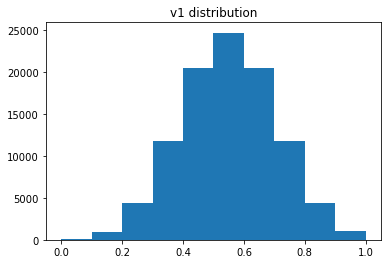

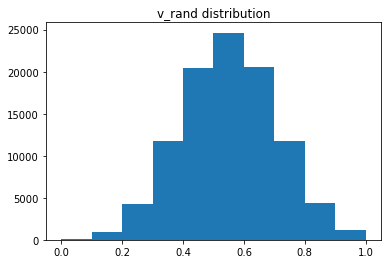

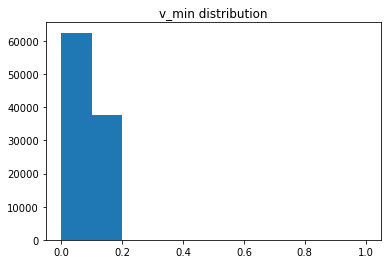

In [15]:
plt.hist(v1_s, bins=np.linspace(0, 10, 11)/10)
plt.title("v1 distribution")
plt.show()

plt.hist(v_rand_s, bins=np.linspace(0, 10, 11)/10)
plt.title("v_rand distribution")
plt.show()

plt.hist(v_min_s, bins=np.linspace(0, 10, 11)/10)
plt.title("v_min distribution")
plt.show()

For c1....

The requirement for Hoeffding's inequality to apply is that the underlying probability distribution must be binomial, hence the anser is

 <font color='green'>d</font>

## Error and Noise

![](imgs/error1.png)

[a] µ

[b] λ

[c] 1-µ

[d] (1 − λ) ∗ µ + λ ∗ (1 − µ)

[e] (1 − λ) ∗ (1 − µ) + λ ∗ µ

I stared at this for 30mins and couldn't figure it out, but this person did!

https://github.com/homefish/edX_Learning_From_Data_2017/blob/master/homework_2/homework_2_problem_3_4_Error_and_Noise.ipynb

![](imgs/error1_solution.png)

### 4. At what value of λ will the performance of h be independent of µ?

[a] 0

[b] 0.5

[c] 1/√2

[d] 1

[e] No values of λ

Guessing `1` because it cancels the noise entirely, but let's see with some expansion...

```
"Performance of h" = P(error) = λ * µ + (1 - λ) * (1 - µ)
    = λ * µ + 1 - µ - λ + λ * µ
    = 2 * λ * µ - µ - λ + 1
    = µ * ( 2 * λ - 1) - λ + 1
```

This cancels out `µ at λ = 0.5` so the correct answer should be

 <font color='green'>b</font>

## Linear Regression

![](imgs/linreg5.png)

In [9]:
def set_axis_cartesian():
    ax = plt.figure().add_subplot(1, 1, 1)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])

Random Point 1: [-0.35985114 -0.69736603]
Random Point 2: [0.19536146 0.0544869 ]
1.354171232939797
-0.21006596271458372


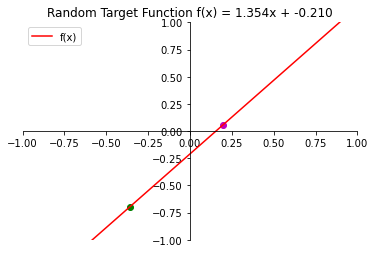

In [12]:
p1 = np.random.uniform(-1, 1, size=2)
p2 = np.random.uniform(-1, 1, size=2)

print('Random Point 1:', p1)
print('Random Point 2:', p2)

set_axis_cartesian()

plt.plot(p1[0], p1[1], 'go')
plt.plot(p2[0], p2[1], 'mo')

m = (p1[1] - p2[1]) / (p1[0] - p2[0])
print(m)

c = p1[1] - m*p1[0]
print(c)

x_axis = np.linspace(-1,1, 100)
y_axis = m*(x_axis)+c
plt.plot(x_axis, y_axis, 'r', label='f(x)')

plt.title(f'Random Target Function f(x) = {m:.3f}x + {c:.3f}')
plt.legend(loc='upper left')

plt.show()

In [13]:
N = 100
